# Imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [59]:
data = pd.read_csv('../data/airplane_passengers_monthly.csv', encoding='unicode_escape', sep=';', header=None).drop(0, axis=1)
data.columns = ['str_date', 'passengers']

In [60]:
data['month'] = data['str_date'].apply(lambda x: int(x.split('M')[1]))
data['year'] = data['str_date'].apply(lambda x: int(x.split('M')[0]))
data = data[['year', 'month', 'passengers']]

# Monthly departures

In [61]:
mean_monthly = pd.DataFrame(data.groupby(['month'])['passengers'].mean()).reset_index()

In [62]:
mean_monthly['mean_subtracted_passengers']=(mean_monthly['passengers']-mean_monthly['passengers'].mean())

<BarContainer object of 12 artists>

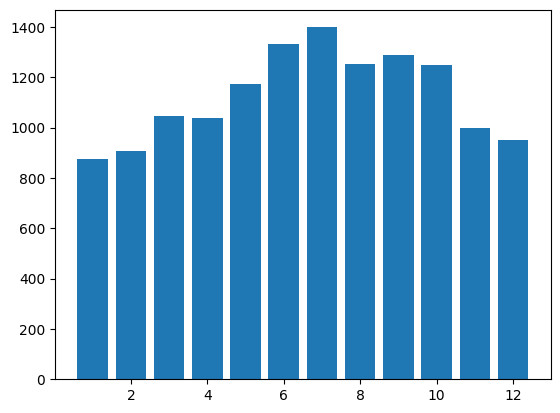

In [63]:
plt.bar(mean_monthly['month'], mean_monthly['passengers'])

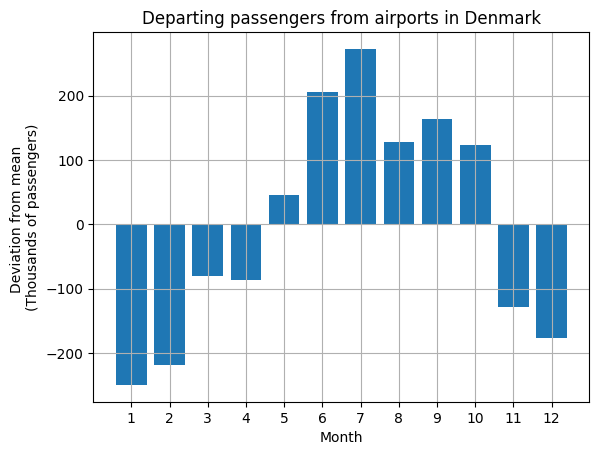

In [71]:
plt.bar(mean_monthly['month'], mean_monthly['mean_subtracted_passengers'])
plt.xlabel('Month')
plt.ylabel('Deviation from mean \n(Thousands of passengers)')
plt.xticks(np.arange(1,13))
plt.title('Departing passengers from airports in Denmark')
plt.grid()
plt.show()

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_41008/244315170.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting


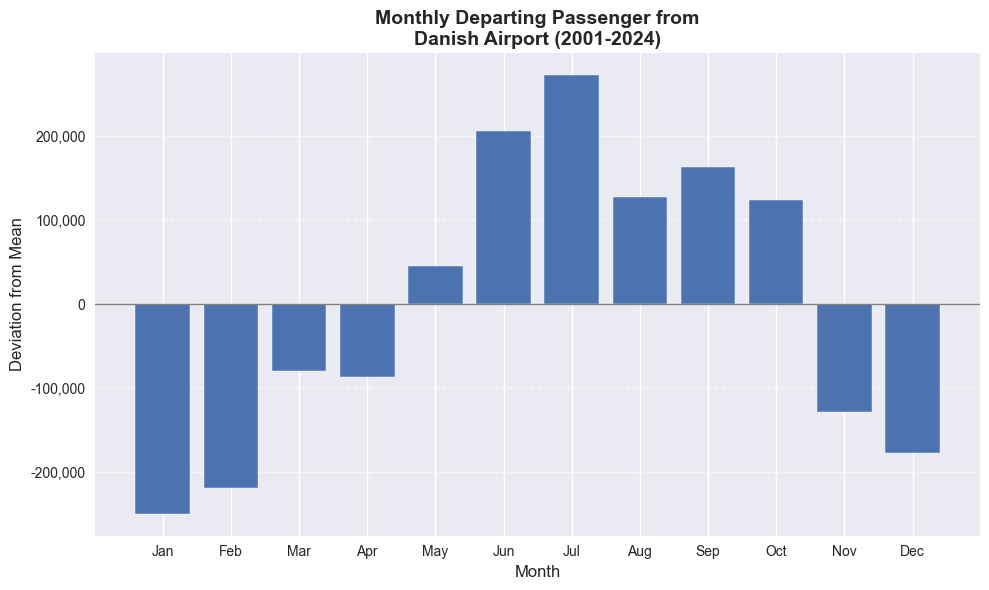

In [91]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')  # optional, gives a cleaner grid style

# Create the bar plot
plt.bar(mean_monthly['month'], mean_monthly['mean_subtracted_passengers'], edgecolor='white') # color='red'

# Title and axis labels with improved formatting
plt.title('Monthly Departing Passenger from\nDanish Airports (2001-2024)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Deviation from Mean', fontsize=12)

# Set x-axis ticks
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           fontsize=10)

# yticks
ax = plt.gca()
yticks = ax.get_yticks()
ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting

# Add grid lines only on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add horizontal line at y=0 for reference
plt.axhline(0, color='gray', linewidth=1)

# Tight layout for spacing
plt.tight_layout()

# Show plot
plt.show()

# Trend across time

In [92]:
data['day'] = 1
data['date'] = pd.to_datetime(data[['day', 'month', 'year']])

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_41008/4172761091.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting


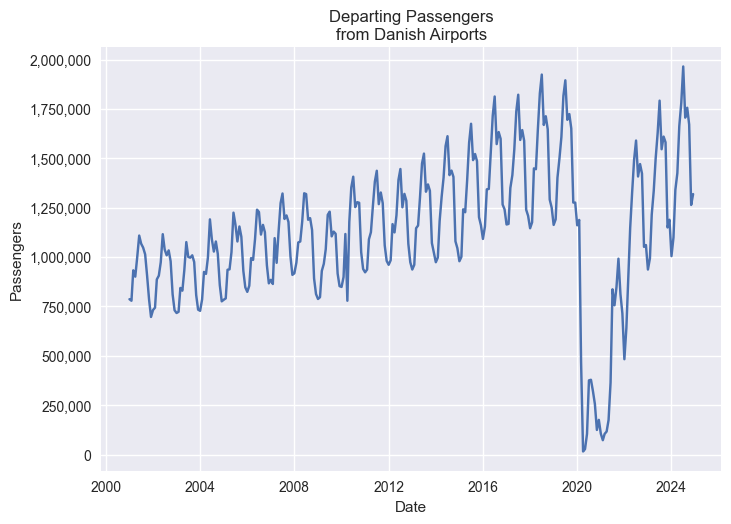

In [102]:
plt.plot(data['date'], data['passengers'])
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Departing Passengers\nfrom Danish Airports')
# yticks
ax = plt.gca()
yticks = ax.get_yticks()
ax.set_yticklabels([f"{int(tick * 1000):,}" for tick in yticks])  # comma formatting
plt.show()

An increase in flight across time from 2001. A fall during the corona virus. 
Annotation could be used here.